### pip install streamlit

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas_datareader as data
import yfinance as yf

In [83]:
start = '2012-01-01'
end = '2023-05-10'

df = yf.download('^BSESN',start,end)

df.shape

[*********************100%***********************]  1 of 1 completed


(2785, 6)

In [84]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-03,61274.960938,61274.960938,61024.441406,61193.300781,61193.300781,6100
2023-05-04,61258.128906,61797.910156,61119.558594,61749.250000,61749.250000,8100
2023-05-05,61163.101562,61585.500000,61002.171875,61054.289062,61054.289062,5600
2023-05-08,61166.089844,61854.191406,61166.089844,61764.250000,61764.250000,7900
2023-05-09,61879.679688,62027.511719,61654.941406,61761.328125,61761.328125,0


In [85]:
df = df.reset_index()
df=df.drop(['Date','Adj Close'],axis=1)
df

,Open,High,Low,Close,Volume
0,15640.559570,15970.309570,15640.559570,15939.360352,16200
1,15967.490234,16004.690430,15822.320312,15882.639648,17800
2,15893.070312,15980.169922,15809.309570,15857.080078,21200
3,15789.080078,16001.309570,15664.910156,15867.730469,17200
4,15840.219727,15871.509766,15678.299805,15814.719727,11200
...,...,...,...,...,...
2780,61274.960938,61274.960938,61024.441406,61193.300781,6100
2781,61258.128906,61797.910156,61119.558594,61749.250000,8100
2782,61163.101562,61585.500000,61002.171875,61054.289062,5600
2783,61166.089844,61854.191406,61166.089844,61764.250000,7900


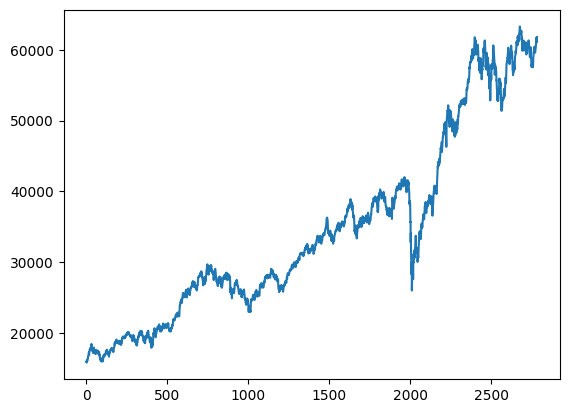

In [86]:
plt.plot(df.Close)

In [87]:
mavg_days=10

In [88]:
mavg = df.Close.rolling(mavg_days).mean()

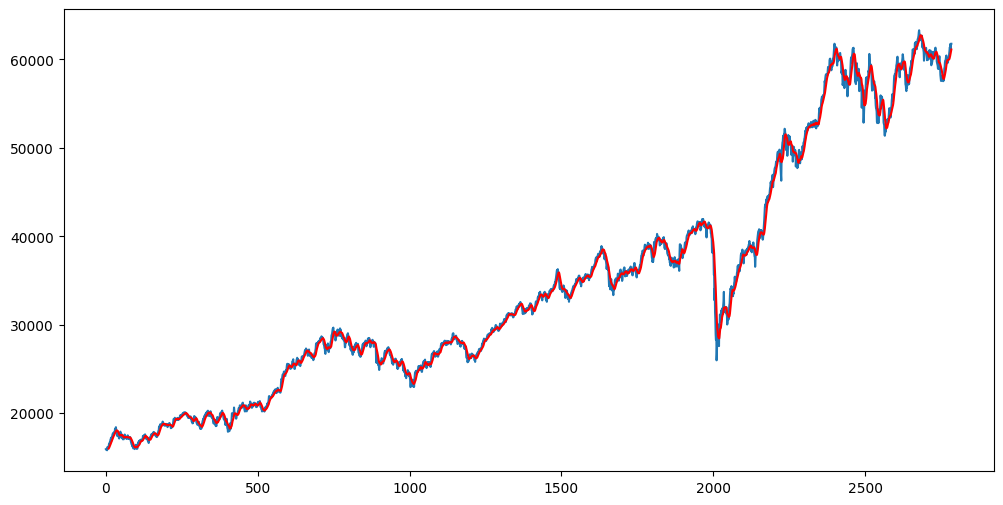

In [89]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mavg,'r')

In [90]:
df.shape

(2785, 5)

In [91]:
# splitting data into training and testing samples
data_training = pd.DataFrame(df['Close'][:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [92]:
print(data_training.shape[0] + data_testing.shape[0])
print(data_training.shape)
print(data_testing.shape)

2785
(1949, 1)
(836, 1)


In [93]:
print(data_training.head())
print(data_testing.head())

          Close
0  15939.360352
1  15882.639648
2  15857.080078
3  15867.730469
4  15814.719727
             Close
1949  41681.539062
1950  41642.660156
1951  41461.261719
1952  41163.761719
1953  41575.140625


In [94]:
# scaling down the data using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [95]:
data_training_array = scaler.fit_transform(data_training)
type(data_training_array)

numpy.ndarray

In [96]:
data_training_array[0,0]

0.004819971795128719

In [97]:
print(data_training_array)

[[0.00481997]
 [0.00262653]
 [0.00163812]
 ...
 [0.98755762]
 [0.99553925]
 [1.        ]]


In [98]:
x_train = []
y_train = []
for i in range(mavg_days,data_training_array.shape[0]):
    x_train.append(data_training_array[i-mavg_days:i])
    y_train.append(data_training_array[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [99]:
x_train=x_train.squeeze()
x_train

array([[0.00481997, 0.00262653, 0.00163812, ..., 0.0086155 , 0.01314427,
        0.01448771],
       [0.00262653, 0.00163812, 0.00204998, ..., 0.01314427, 0.01448771,
        0.02518759],
       [0.00163812, 0.00204998, 0.        , ..., 0.01448771, 0.02518759,
        0.02462377],
       ...,
       [0.96138811, 0.96814933, 0.96541533, ..., 0.95776316, 0.97431433,
        0.97156899],
       [0.96814933, 0.96541533, 0.95248216, ..., 0.97431433, 0.97156899,
        0.98755762],
       [0.96541533, 0.95248216, 0.95411722, ..., 0.97156899, 0.98755762,
        0.99553925]])

In [100]:
# ML Model

In [101]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [102]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 10, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 10, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 10, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 10, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [104]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
61/61 [==============================] - 10s 61ms/step - loss: 0.0623
Epoch 2/100
61/61 [==============================] - 4s 61ms/step - loss: 0.0105
Epoch 3/100
61/61 [==============================] - 4s 62ms/step - loss: 0.0082
Epoch 4/100
61/61 [==============================] - 4s 61ms/step - loss: 0.0070
Epoch 5/100
61/61 [==============================] - 4s 61ms/step - loss: 0.0059
Epoch 6/100
61/61 [==============================] - 3s 57ms/step - loss: 0.0056
Epoch 7/100
61/61 [==============================] - 3s 44ms/step - loss: 0.0056
Epoch 8/100
61/61 [==============================] - 3s 49ms/step - loss: 0.0054
Epoch 9/100
61/61 [==============================] - 3s 53ms/step - loss: 0.0054
Epoch 10/100
61/61 [==============================] - 3s 54ms/step - loss: 0.0048
Epoch 11/100
61/61 [==============================] - 3s 53ms/step - loss: 0.0051
Epoch 12/100
61/61 [==============================] - 3s 53ms/step - loss: 0.0048
Epoch 13/100
61/61 [====

In [105]:
model.save('trained-model.h5')

In [106]:
data_testing.head()

,Close
1949,41681.539062
1950,41642.660156
1951,41461.261719
1952,41163.761719
1953,41575.140625


In [107]:
past_mvavg_days = data_training.tail(mavg_days)
data_testing

,Close
1949,41681.539062
1950,41642.660156
1951,41461.261719
1952,41163.761719
1953,41575.140625
...,...
2780,61193.300781
2781,61749.250000
2782,61054.289062
2783,61764.250000


In [108]:
final_df = past_mvavg_days.append(data_testing, ignore_index = True)
final_df = final_df.to_numpy()
final_df.shape

/tmp/ipykernel_21407/3505781674.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_mvavg_days.append(data_testing, ignore_index = True)


(846, 1)

In [109]:
input_data = scaler.fit_transform(final_df)

In [110]:
input_data.shape

(846, 1)

In [111]:
x_test = []
y_test = []

for i in range(mavg_days, input_data.shape[0]):
    x_test.append(input_data[i-mavg_days:i])
    y_test.append(input_data[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)
    

In [112]:
print(x_test.shape)
print(y_test.shape)

(836, 10, 1)
(836,)


In [113]:
x_test = x_test.squeeze()

In [114]:
# Making predictions

y_predicted = model.predict(x_test)
y_train_predicted = model.predict(x_train)

61/61 [==============================] - 1s 19ms/step


In [115]:
y_predicted.shape

(836, 1)

In [116]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [117]:
y_train_predicted = scaler.inverse_transform(y_train_predicted.reshape(-1,1))
y_train = scaler.inverse_transform(y_train.reshape(-1,1))

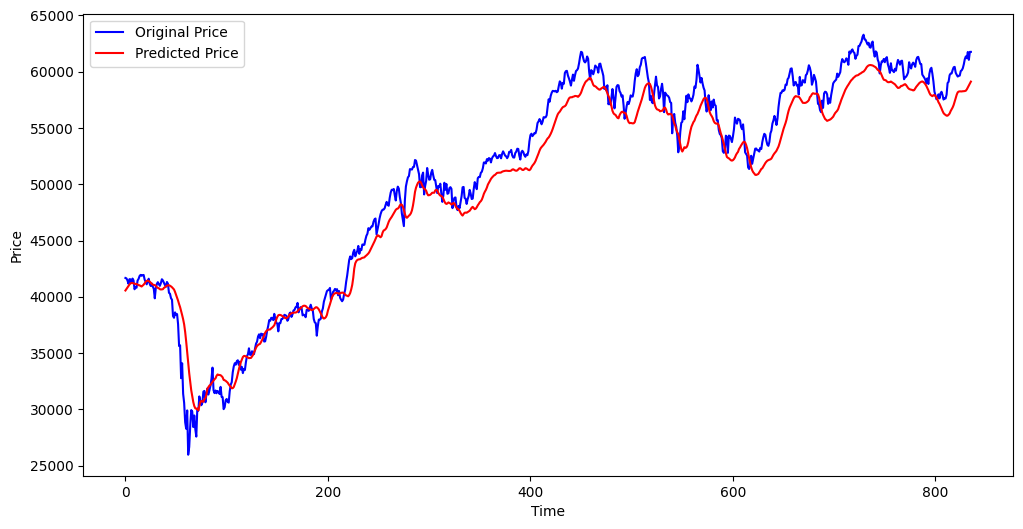

In [118]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

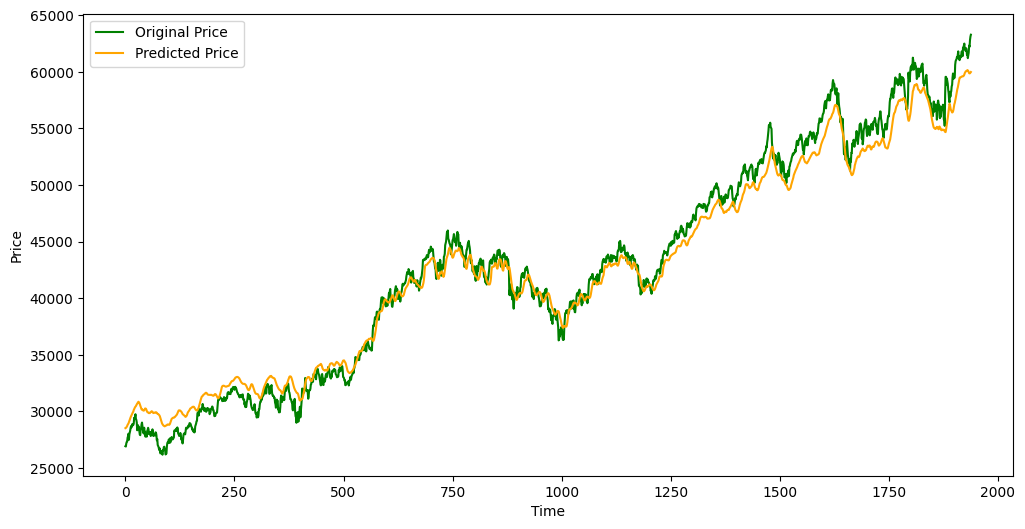

In [119]:
plt.figure(figsize=(12,6))
plt.plot(y_train,'green', label = 'Original Price')
plt.plot(y_train_predicted,'orange', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [120]:
x_test[0].shape
y_test[1]

array([41642.66015625])

In [121]:
from sklearn import metrics

In [122]:
test_score = metrics.mean_squared_error(y_test,y_predicted)
train_score = metrics.mean_squared_error(y_train,y_train_predicted)

In [123]:
print("test error :",test_score)
print("train error :",train_score)

test error : 3863826.6558196135
train error : 1972523.7692004333


In [124]:
next_x_days=2
closing_price_for_future=[]
last_price = scaler.fit_transform(y_test)
last_price = last_price.squeeze()
total_len = last_price.shape[0]
last_price = last_price[total_len-mavg_days:]
print(last_price)

[0.91546298 0.9200167  0.92936718 0.94178075 0.94827539 0.94394839
 0.95885201 0.94022182 0.95925412 0.9591758 ]


In [125]:
for i in range(next_x_days):
    total_len = last_price.shape[0]
    test_data = last_price[total_len-mavg_days:]
    test_data = test_data.reshape((1,mavg_days))
    pred_price = model.predict(test_data)
    closing_price_for_future.append(pred_price)
    last_price = np.append(last_price,pred_price)


1/1 [==============================] - 0s 38ms/step


In [126]:
closing_price_for_future = np.array(closing_price_for_future)
closing_price_for_future.shape

(2, 1, 1)

In [127]:
closing_price_for_future = scaler.inverse_transform(closing_price_for_future.reshape(-1,1))

In [128]:
closing_price_for_future.shape

(2, 1)

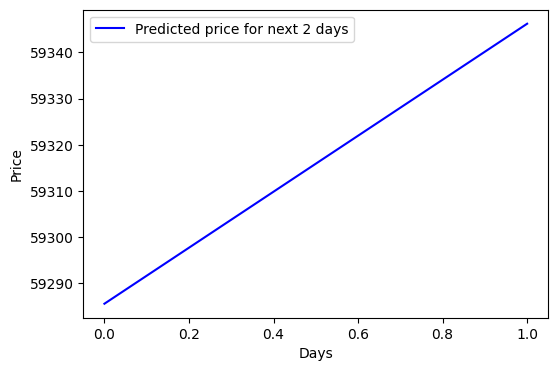

In [129]:
plt.figure(figsize=(6,4))
label = f'Predicted price for next {next_x_days} days'
plt.plot(closing_price_for_future,'blue', label = label)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [130]:
predicted_table = pd.DataFrame(
    closing_price_for_future,
    columns=['Price'])
predicted_table.index = predicted_table.index+1
predicted_table.index.name = 'Days'
predicted_table

,Price
Days,
1,59285.605469
2,59346.191406


In [131]:
closing_price_for_future

array([[59285.605],
       [59346.19 ]], dtype=float32)